In [1]:
import pandas as pd
from PIL import Image
import os

In [3]:
import pandas as pd
import os

data_folder='../datasets'

category_df = pd.read_csv(
    os.path.join(data_folder, 'list_category_cloth.txt'), 
    skiprows=[0], 
    delim_whitespace=True                                      
    
)

category_map = {}
for i, name in enumerate(category_df['category_name']):
    category_map[i+1] = name

attributes=[]
with open(os.path.join(data_folder, 'list_attr_cloth.txt'), 'r') as f:
    next(f)
    next(f)
    for line in f:
        parts = line.split()
        if not parts:
            continue
        attr_type = parts[-1]
        attr_name = " ".join(parts[:-1])
        attributes.append([attr_name, attr_type])

attribute_df = pd.DataFrame(attributes, columns=['attribute_name', 'attribute_type'])

attribute_map = {}
for i, name in enumerate(attribute_df['attribute_name']):
    attribute_map[i+1] = name


C:\Users\arise\AppData\Local\Temp\ipykernel_22416\142284644.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  category_df = pd.read_csv(


In [4]:

train_path_df = pd.read_csv(
    os.path.join(data_folder, 'train.txt'),
    delim_whitespace=True,
    header=None,  
    names=['image_path']
)

train_cate_df = pd.read_csv(
    os.path.join(data_folder, 'train_cate.txt'),
    delim_whitespace=True,
    header=None, 
    names=['category_id']
)

train_df = pd.concat([train_path_df, train_cate_df], axis=1)

print(train_df.head())

                                          image_path  category_id
0          img/Sweet_Crochet_Blouse/img_00000070.jpg            3
1          img/Classic_Pencil_Skirt/img_00000010.jpg           33
2  img/Strapless_Diamond_Print_Dress/img_00000038...           41
3  img/Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_0000...           26
4  img/Zippered_Single-Button_Blazer/img_00000078...            2


C:\Users\arise\AppData\Local\Temp\ipykernel_22416\2823270470.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_path_df = pd.read_csv(
C:\Users\arise\AppData\Local\Temp\ipykernel_22416\2823270470.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_cate_df = pd.read_csv(


In [5]:
train_path_df = pd.read_csv(
    os.path.join(data_folder, 'train.txt'),
    delim_whitespace=True,
    header=None,  
    names=['image_path']
)

train_attr_df = pd.read_csv(
    os.path.join(data_folder, 'train_attr.txt'),
    delim_whitespace=True,
    header=None,           
    names=['image_path_copy'] + list(range(1, 26))
)
train_attr_full_df = pd.concat([train_path_df, train_attr_df], axis=1)

train_attr_full_df = train_attr_full_df.drop(columns=['image_path_copy'])


print("\nSuccessfully merged training paths with attributes:")
print(train_attr_full_df.head())

print("\nShape of the final attribute table:", train_attr_full_df.shape)


Successfully merged training paths with attributes:
                                          image_path  1  2  3  4  5  6  7  8  \
0          img/Sweet_Crochet_Blouse/img_00000070.jpg  0  0  1  0  0  0  0  0   
1          img/Classic_Pencil_Skirt/img_00000010.jpg  0  0  0  0  1  0  0  0   
2  img/Strapless_Diamond_Print_Dress/img_00000038...  1  0  0  0  0  0  0  0   
3  img/Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_0000...  0  0  0  0  1  0  0  0   
4  img/Zippered_Single-Button_Blazer/img_00000078...  0  0  0  0  1  0  1  0   

   9  ...  16  17  18  19  20  21  22  23  24  25  
0  1  ...   1   0   1   0   0   0   0   0   0   1  
1  1  ...   1   0   0   1   0   0   0   1   0   0  
2  1  ...   1   0   0   1   0   0   0   0   0   1  
3  1  ...   1   1   0   0   0   0   0   1   0   0  
4  0  ...   0   0   0   1   0   0   0   0   0   1  

[5 rows x 26 columns]

Shape of the final attribute table: (14000, 26)


C:\Users\arise\AppData\Local\Temp\ipykernel_22416\3640681397.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_path_df = pd.read_csv(
C:\Users\arise\AppData\Local\Temp\ipykernel_22416\3640681397.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_attr_df = pd.read_csv(



--- Analysis for: img/Classic_Pencil_Skirt/img_00000010.jpg ---


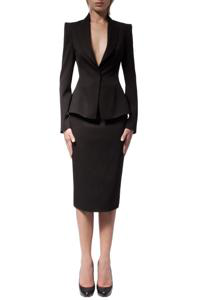


✅ Category: Skirt

✅ Attributes:
- pleated
- short_sleeve
- mini_length
- square_neckline
- chiffon
- knit


In [6]:
from PIL import Image
from IPython.display import display
import os

image_path_to_test = train_df['image_path'].iloc[1]

print(f"\n--- Analysis for: {image_path_to_test} ---")

category_row = train_df[train_df['image_path'] == image_path_to_test]
category_id = category_row['category_id'].iloc[0]
category_name = category_map[category_id]

attribute_row = train_attr_full_df[train_attr_full_df['image_path'] == image_path_to_test]
present_attributes_series = attribute_row.iloc[0, 1:]
present_attribute_ids = present_attributes_series[present_attributes_series == 1].index.tolist()
attribute_names = [attribute_map[attr_id] for attr_id in present_attribute_ids]

full_image_path = os.path.join(data_folder, image_path_to_test)
image = Image.open(full_image_path)
display(image)

print(f"\n✅ Category: {category_name}")
print("\n✅ Attributes:")
if attribute_names:
    for name in attribute_names:
        print(f"- {name}")
else:
    print("No attributes found.")


In [7]:
import tensorflow 

In [24]:


from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    """Loads and prepares an image for ResNet50."""
    
    # Load the image from the path, resizing it to 224x224 pixels
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the image to a NumPy array
    img_array = image.img_to_array(img)
    
    # Add an extra dimension because the model expects a "batch" of images
    img_array_expanded = np.expand_dims(img_array, axis=0)
    
    # Use the special ResNet50 preprocess_input function to scale pixel values
    return preprocess_input(img_array_expanded)




In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

feature_extractor_model = Model(inputs=base_model.input, outputs=x)

print("\nModel created successfully!")


Model created successfully!


In [25]:

image_path_to_test = train_df['image_path'].iloc[0]
full_image_path = os.path.join(data_folder, image_path_to_test)

try:
    processed_image = preprocess_image(full_image_path)

    feature_vector = feature_extractor_model.predict(processed_image)

    print(f"Successfully extracted features for: {image_path_to_test}")
    print(f"Shape of the feature vector: {feature_vector.shape}")
    print("\nThis vector is the numerical representation of your image!")

except FileNotFoundError:
    print(f"[ERROR] Could not find the image file at: {full_image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Successfully extracted features for: img/Sweet_Crochet_Blouse/img_00000070.jpg
Shape of the feature vector: (1, 2048)

This vector is the numerical representation of your image!


In [26]:
import numpy as np
import pickle

features_dict = {}

total_images = len(train_df)
print(f"Starting feature extraction for {total_images} images...")

for i, row in train_df.iterrows():
    image_path = row['image_path']
    full_image_path = os.path.join(data_folder, image_path)
    try:
        processed_image = preprocess_image(full_image_path)

        feature_vector = feature_extractor_model.predict(processed_image)

        features_dict[image_path] = feature_vector
        
    except FileNotFoundError:
        print(f"\n[WARNING] Could not find image file, skipping: {full_image_path}")
        continue
    if (i + 1) % 100 == 0:
        print(f"  Processed {i + 1} / {total_images} images")

print("\n--- Feature extraction complete! ---")

with open('extracted_features.pkl', 'wb') as f:
    pickle.dump(features_dict, f)

print(f"Successfully saved {len(features_dict)} feature vectors to 'extracted_features.pkl'")

Starting feature extraction for 14000 images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/

In [27]:
category_df['category_id'] = range(1, len(category_df) + 1)

train_df_full = pd.merge(train_df, category_df, on='category_id')

In [28]:
upper_body_paths = train_df_full[train_df_full['category_type'] == 1]['image_path'].tolist()
lower_body_paths = train_df_full[train_df_full['category_type'] == 2]['image_path'].tolist()
len(lower_body_paths)

2644

In [29]:
len(upper_body_paths)

6372

In [32]:
import random

positive_pairs=[]
negative_pairs=[]

no_of_pairs_needed=10000

for i in range(no_of_pairs_needed):
    top=random.choice(upper_body_paths)
    bottom=random.choice(lower_body_paths)
    positive_pairs.append([top,bottom,1])

for i in range(no_of_pairs_needed//2):
    top1=random.choice(upper_body_paths)
    top2=random.choice(upper_body_paths)
    negative_pairs.append([top1,top2,0])

for i in range(no_of_pairs_needed//2):
    bottom1=random.choice(lower_body_paths)
    bottom2=random.choice(lower_body_paths)
    negative_pairs.append([bottom1,bottom2,0])

In [33]:
train_attr_full_df

,image_path,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,img/Sweet_Crochet_Blouse/img_00000070.jpg,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
1,img/Classic_Pencil_Skirt/img_00000010.jpg,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,img/Strapless_Diamond_Print_Dress/img_00000038...,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,img/Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_0000...,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
4,img/Zippered_Single-Button_Blazer/img_00000078...,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,img/Baroque_Print_High-Neck_Romper/img_0000002...,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
13996,img/Crocheted_Mandala_Print_Dress/img_00000007...,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
13997,img/Mesh_Contrast-Pocket_Tank/img_00000031.jpg,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
13998,img/Classic_Toggle_Coat/img_00000025.jpg,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [34]:
features_dict

{'img/Sweet_Crochet_Blouse/img_00000070.jpg': array([[0.9563502 , 2.581206  , 0.05316509, ..., 0.        , 0.        ,
         0.7434499 ]], shape=(1, 2048), dtype=float32),
 'img/Classic_Pencil_Skirt/img_00000010.jpg': array([[0.19307862, 1.0566856 , 0.        , ..., 0.2203163 , 0.05067293,
         0.42370033]], shape=(1, 2048), dtype=float32),
 'img/Strapless_Diamond_Print_Dress/img_00000038.jpg': array([[0.21750693, 0.16540185, 0.        , ..., 0.8473089 , 0.8036032 ,
         0.53952354]], shape=(1, 2048), dtype=float32),
 'img/Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_00000010.jpg': array([[0.31834838, 1.456194  , 0.05190674, ..., 0.0897221 , 0.10646479,
         0.23849034]], shape=(1, 2048), dtype=float32),
 'img/Zippered_Single-Button_Blazer/img_00000078.jpg': array([[0.7716762 , 3.0306375 , 0.12888175, ..., 0.        , 0.2016217 ,
         0.5176717 ]], shape=(1, 2048), dtype=float32),
 'img/Abstract_Chevron_Draped_Dress/img_00000013.jpg': array([[0.12114976, 0.70799595, 0.     

In [35]:
all_pairs=positive_pairs+negative_pairs
random.shuffle(all_pairs)

In [36]:
len(all_pairs)

20000

In [37]:
processed_data=[]
train_attr_full_df_indexed=train_attr_full_df.set_index('image_path')

print("Assembling final DataFrame... This may take a moment.")

for path_a, path_b, label in all_pairs:
    try:
        features_a = features_dict[path_a].flatten()
        features_b = features_dict[path_b].flatten()
        
        attributes_a = train_attr_full_df_indexed.loc[path_a].values
        attributes_b = train_attr_full_df_indexed.loc[path_b].values
      
        combined_row = np.concatenate([features_a, attributes_a, features_b, attributes_b, [label]])
        processed_data.append(combined_row)
        
    except KeyError:
        continue


Assembling final DataFrame... This may take a moment.


In [38]:
num_features = features_a.shape[0]
num_attributes = attributes_a.shape[0]

columns_a = [f'feat_A_{i}' for i in range(num_features)] + [f'attr_A_{i}' for i in range(num_attributes)]
columns_b = [f'feat_B_{i}' for i in range(num_features)] + [f'attr_B_{i}' for i in range(num_attributes)]
final_columns = columns_a + columns_b + ['label']

final_training_df = pd.DataFrame(processed_data, columns=final_columns)

print("\n--- Final Training DataFrame ---")
print(f"Shape of the DataFrame: {final_training_df.shape}")
print(final_training_df.head())


--- Final Training DataFrame ---
Shape of the DataFrame: (20000, 4147)
   feat_A_0  feat_A_1  feat_A_2  feat_A_3  feat_A_4  feat_A_5  feat_A_6  \
0  0.468913  0.904107  0.033911  0.476504  0.010970  0.030483  0.066517   
1  0.235070  0.831804  0.000000  0.658674  0.070746  0.000000  0.290543   
2  0.336488  0.708129  0.429639  0.054663  0.079551  0.240401  0.020063   
3  0.235259  0.407119  0.037162  0.111904  0.060417  0.000000  0.744718   
4  0.198139  0.339028  0.359613  1.086366  0.356969  0.000000  0.356828   

   feat_A_7  feat_A_8  feat_A_9  ...  attr_B_16  attr_B_17  attr_B_18  \
0  1.067084  0.019266  0.098024  ...        1.0        0.0        0.0   
1  0.157034  0.000054  0.000000  ...        0.0        0.0        1.0   
2  0.227243  1.006013  0.080307  ...        0.0        0.0        1.0   
3  2.574747  0.000000  0.000464  ...        0.0        0.0        0.0   
4  0.101507  0.000000  0.631807  ...        0.0        0.0        1.0   

   attr_B_19  attr_B_20  attr_B_21  at

In [39]:
X=final_training_df.drop('label',axis=1)
y=final_training_df['label']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("--- Data Split Complete ---")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

--- Data Split Complete ---
Shape of X_train: (16000, 4146)
Shape of y_train: (16000,)
Shape of X_val: (4000, 4146)
Shape of y_val: (4000,)


--- Model Architecture ---


c:\Users\arise\anaconda\envs\my_new_housing_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │       265,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,633 (1.03 MB)

 Trainable params: 269,633 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8450 - loss: 0.3458 - val_accuracy: 0.9053 - val_loss: 0.2285
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9174 - loss: 0.1995 - val_accuracy: 0.9103 - val_loss: 0.2099
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9443 - loss: 0.1391 - val_accuracy: 0.9480 - val_loss: 0.1396
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9553 - loss: 0.1144 - val_accuracy: 0.9190 - val_loss: 0.1989
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9631 - loss: 0.0940 - val_accuracy: 0.9383 - val_loss: 0.1613
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9686 - loss: 0.0839 - val_accuracy: 0.9585 - val_loss: 0.1279
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9814 - loss: 0.0536 - val_accuracy: 0.9452 - val_loss: 0.1531
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9787 

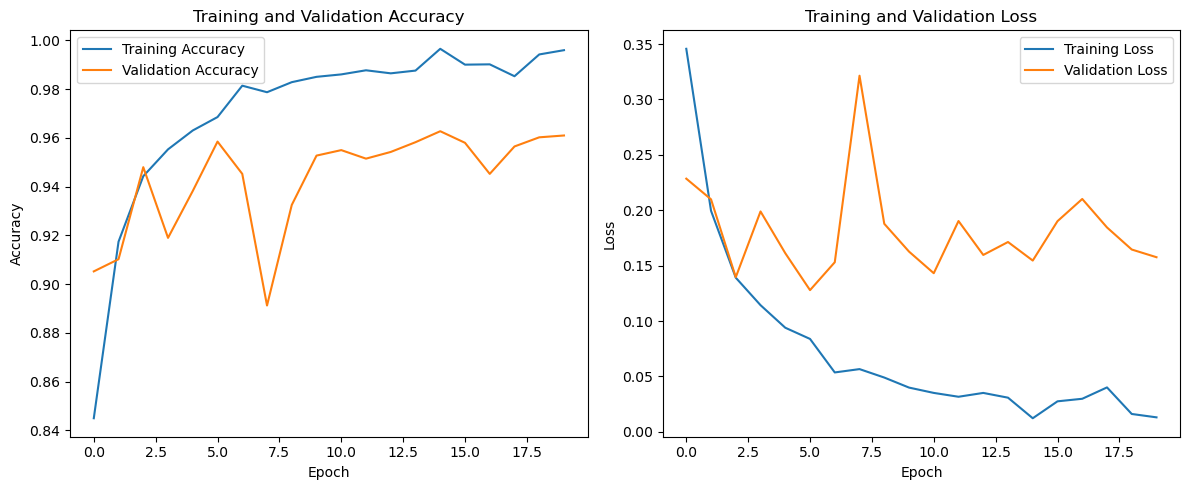


--- Model Saved Successfully to 'outfit_compatibility_model.h5' ---


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# --- Step 1: Define the Model Architecture ---

# Get the number of input features from the shape of our training data
input_dim = X_train.shape[1]

model = Sequential([
    # Input Layer: Takes in the combined feature vector for a pair.
    # 'relu' is a standard activation function that works well.
    Dense(64, activation='relu', input_dim=input_dim),
    
    # Hidden Layer: A "thinking" layer to find complex patterns.
    Dense(64, activation='relu'),
    
    # Output Layer: A single neuron with a 'sigmoid' activation.
    # Sigmoid squishes the output to a probability score between 0 and 1.
    Dense(1, activation='sigmoid')
])

# --- Step 2: Compile the Model ---

# Configure the model with its learning plan
model.compile(
    optimizer='adam',                 # Adam is an efficient, all-purpose optimizer.
    loss='binary_crossentropy',       # Best for yes/no (binary) classification problems.
    metrics=['accuracy']              # The metric we want to track during training.
)

# Print a summary of the model's architecture
print("--- Model Architecture ---")
model.summary()


# --- Step 3: Train the Model ---

print("\n--- Starting Model Training ---")
# The .fit() command starts the training process
# We save the results of the training into a 'history' object
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,          # How many times to go through the entire dataset.
    batch_size=64,      # How many examples the model sees at once.
    verbose=1           # Set to 1 to see the progress bar, 2 for just numbers per epoch.
)
print("\n--- Model Training Complete ---")


# --- Step 4: Visualize the Training History ---

print("\n--- Plotting Training History ---")
# Create a DataFrame from the history object
history_df = pd.DataFrame(history.history)

# Plot the accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# --- Step 5: Save the Trained Model ---
# Save the final model to a single file
model.save('2nd_outfit_compatibility_model.h5')
print("\n--- Model Saved Successfully to 'outfit_compatibility_model.h5' ---")

--- New Model Architecture with Dropout ---


c:\Users\arise\anaconda\envs\my_new_housing_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       530,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,137 (2.06 MB)

 Trainable params: 539,137 (2.06 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7862 - loss: 0.4530 - val_accuracy: 0.8522 - val_loss: 0.3250
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8496 - loss: 0.3381 - val_accuracy: 0.8615 - val_loss: 0.3032
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8659 - loss: 0.2965 - val_accuracy: 0.8947 - val_loss: 0.2537
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8923 - loss: 0.2575 - val_accuracy: 0.9160 - val_loss: 0.2101
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9054 - loss: 0.2235 - val_accuracy: 0.9268 - val_loss: 0.1846
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9214 - loss: 0.1887 - val_accuracy: 0.9327 - val_loss: 0.1686
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9222 - loss: 0.1836 - val_accuracy: 0.9445 - val_loss: 0.1528
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9356 

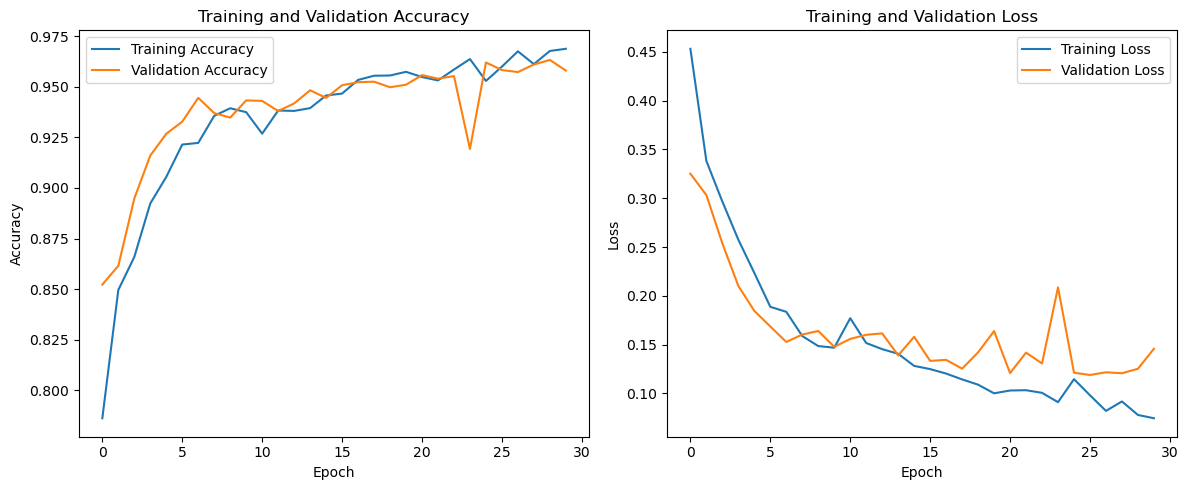


--- Tuned Model Saved Successfully to 'outfit_compatibility_model_tuned.h5' ---


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Define the Model Architecture with Dropout ---

# Get the number of input features from the shape of our training data
input_dim = X_train.shape[1]

model = Sequential([
    # Input Layer and first hidden layer
    Dense(128, activation='relu', input_dim=input_dim),
    
    # NEW: Dropout Layer to prevent overfitting
    # It will randomly "turn off" 40% of the neurons from the layer above during training.
    Dropout(0.4),
    
    # A second hidden layer
    Dense(64, activation='relu'),
    
    # NEW: A second Dropout layer for further regularization
    Dropout(0.3),
    
    # Output Layer
    Dense(1, activation='sigmoid')
])

# --- Step 2: Compile the Model ---

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the new architecture
print("--- New Model Architecture with Dropout ---")
model.summary()


# --- Step 3: Train the Model ---

print("\n--- Starting Model Training ---")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Increased epochs slightly to give the regularized model more time to learn
    batch_size=64,
    verbose=1
)
print("\n--- Model Training Complete ---")


# --- Step 4: Visualize the Training History ---

print("\n--- Plotting Training History ---")
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# --- Step 5: Save the Final, Tuned Model ---
model.save('3rd_outfit_compatibility_model_tuned.h5')
print("\n--- Tuned Model Saved Successfully to 'outfit_compatibility_model_tuned.h5' ---")

--- New Model Architecture with Batch Normalization & Dropout ---


c:\Users\arise\anaconda\envs\my_new_housing_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       530,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,905 (2.06 MB)

 Trainable params: 539,521 (2.06 MB)

 Non-trainable params: 384 (1.50 KB)


--- Starting Model Training ---
Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8240 - loss: 0.3992 - val_accuracy: 0.8925 - val_loss: 0.2483
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8998 - loss: 0.2430 - val_accuracy: 0.9255 - val_loss: 0.1859
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9276 - loss: 0.1796 - val_accuracy: 0.9085 - val_loss: 0.2339
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9407 - loss: 0.1538 - val_accuracy: 0.9455 - val_loss: 0.1476
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9468 - loss: 0.1352 - val_accuracy: 0.9302 - val_loss: 0.1981
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9540 - loss: 0.1227 - val_accuracy: 0.9385 - val_loss: 0.1676
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9585 - loss: 0.1127 - val_accuracy: 0.9520 - val_loss: 0.1460
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9616 

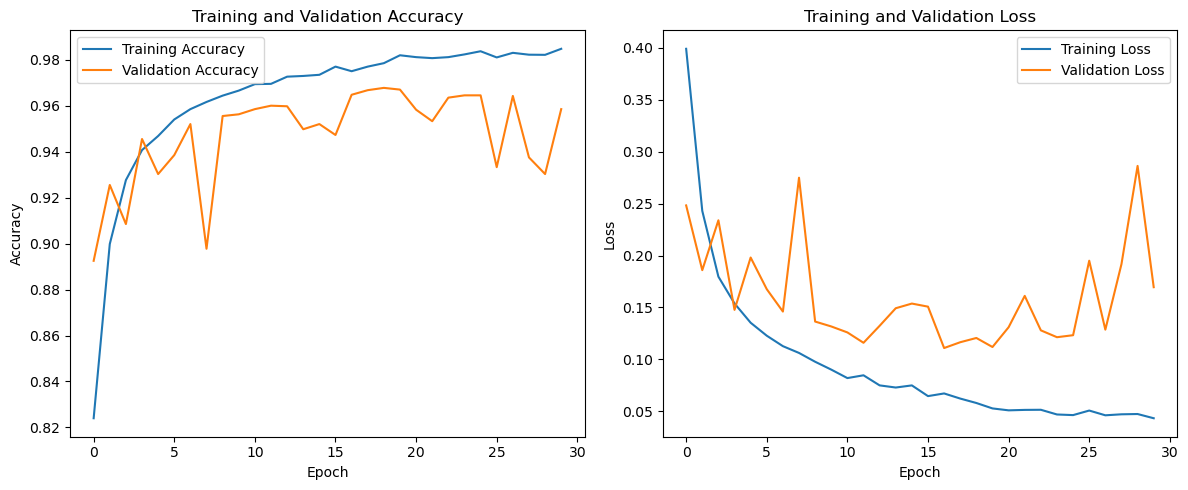


--- Final Tuned Model Saved Successfully to 'outfit_compatibility_model_final.h5' ---


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Define the Model Architecture ---

# Get the number of input features from the shape of our training data
input_dim = X_train.shape[1]

model = Sequential([
    # Input Layer and first hidden layer
    Dense(128, activation='relu', input_dim=input_dim),
    
    # NEW: Batch Normalization layer for stability
    BatchNormalization(),
    
    # Dropout Layer to prevent overfitting
    Dropout(0.4),
    
    # A second hidden layer
    Dense(64, activation='relu'),
    
    # NEW: A second Batch Normalization layer
    BatchNormalization(),
    
    # A second Dropout layer
    Dropout(0.3),
    
    # Output Layer
    Dense(1, activation='sigmoid')
])

# --- Step 2: Compile the Model ---

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the new architecture
print("--- New Model Architecture with Batch Normalization & Dropout ---")
model.summary()


# --- Step 3: Train the Model ---

print("\n--- Starting Model Training ---")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)
print("\n--- Model Training Complete ---")


# --- Step 4: Visualize the Training History ---

print("\n--- Plotting Training History ---")
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# --- Step 5: Save the Final, Tuned Model ---
model.save('4th_outfit_compatibility_model_final.h5')
print("\n--- Final Tuned Model Saved Successfully to 'outfit_compatibility_model_final.h5' ---")